# Loading Pertinent Libraries and Data

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
from xgboost import XGBClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [2]:
population = pd.read_csv('cardio_train.csv', delimiter=';')
population.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Age is in days...need to convert age to years during feature engineeringl

In [3]:
# Setting index to age to eliminate redundancy.
population.set_index("id", inplace=True)
population.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Data Preprocessing

In [4]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [5]:
def data_inspector(df):
    duplicates = df[df.duplicated()]
    display('----Missing Values----',df.isna().sum())
    display('----Duplicate Values----')
    display(str(len(duplicates))  + ' duplicates')

In [6]:
data_inspector(population)

'----Missing Values----'

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

'----Duplicate Values----'

'24 duplicates'

No missing values. Yayy.
Need to examine the duplicates identified.

In [7]:
duplicates = population[population.duplicated()]
print(str(len(duplicates))  + ' duplicates')
duplicates

24 duplicates


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
15094,20495,1,165,70.0,120,80,1,1,0,0,1,0
31110,16793,1,165,68.0,120,80,1,1,0,0,1,0
54977,18988,1,164,65.0,120,80,1,1,0,0,1,0
57690,14552,1,158,64.0,120,80,1,1,0,0,1,0
60642,18353,1,169,67.0,120,80,1,1,0,0,1,0
63776,16937,2,170,70.0,120,80,1,1,0,0,0,0
64445,21280,1,165,65.0,120,80,1,1,0,0,1,0
65352,22077,1,175,69.0,120,80,1,1,0,0,1,1
65438,21230,1,164,62.0,120,80,1,1,0,0,1,0


These "duplicates" all have unique id's. Nothing that needs to be addressed presently.

In [8]:
population.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Feature Engineering

In [9]:
#Convert ages from days to years
population['age'] = population.age/365
population.age.head()

id
0    50.391781
1    55.419178
2    51.663014
3    48.282192
4    47.873973
Name: age, dtype: float64

In [10]:
#Creating a BMI column using weight and height data to see if any new trends/correlations can be found
population['BMI'] = (population.weight/population.height**2) * 10000
population.BMI.head()

id
0    21.967120
1    34.927679
2    23.507805
3    28.710479
4    23.011177
Name: BMI, dtype: float64

# EDA and Visulizations

In [11]:
population.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [12]:
#basic dataframe measure of centrality/quartile spreads
population.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


None of the continuous variables within this dataset have neither a normal distribution 
nor do they display any notable correlations.

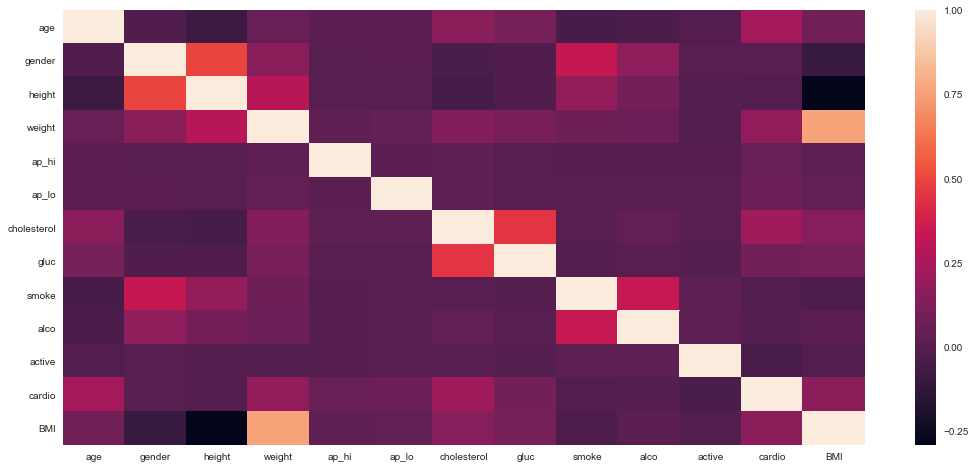

In [13]:
#Checking for any direct correlates
plt.figure(figsize=(16,8))
sns.heatmap(population.corr());

Excluding BMI's interaction with height and weight, the variables within this dataset do not display strong correlations. 
Will need to generate 2 models to control for the above mentioned interactions:
* model including weight and height
* model including BMI 

Will explore factor relationships through variable interactions in addition to generating models.

In [14]:
#Finding the number of women vs men whom participated in the study.
print("Women in study:", len(population[population['gender'] == 1]))
print("Men in study:", len(population[population['gender'] == 2]))

Women in study: 45530
Men in study: 24470


Despite not knowing the population this data was drawn from, the ratio of men to women in this study is considerably off. There are almost 2 women for every man in this study. This sample population is not representative to the general population. 

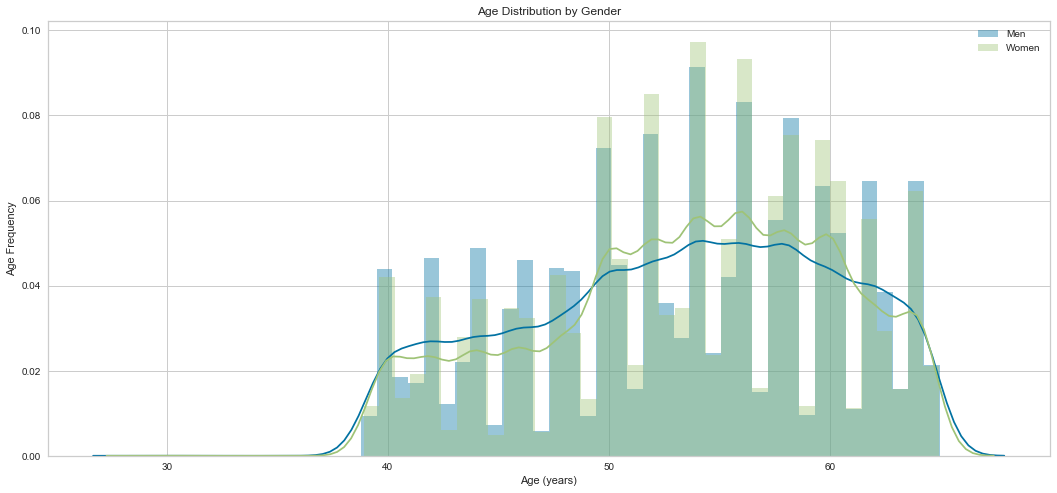

Average age of women within study: 53.452396101922865
Average age of men within study: 53.12903527383265


In [15]:
#checking age distributions by gender
fig = plt.figure(figsize=(16,8))
sns.distplot(population[population['gender'] == 2]['age'], label="Men")
sns.distplot(population[population['gender'] == 1]['age'], label="Women")
plt.title('Age Distribution by Gender')
plt.xlabel('Age (years)')
plt.ylabel('Age Frequency')
plt.legend()
plt.show()

#checking mean ages between men and women
pop_women_age = population[population['gender'] == 1]['age']
pop_men_age = population[population['gender'] == 2]['age']
print("Average age of women within study:", pop_women_age.mean())
print("Average age of men within study:", pop_men_age.mean())

Women appear to have a higher density of particapants ages 48 to 60. Women also have a slightly 
higher median age than men. These difference could be due to the higher numbers of women participating in the 
present study vs men.

It is worth noting that overall, women due tend to have longer lives than men.

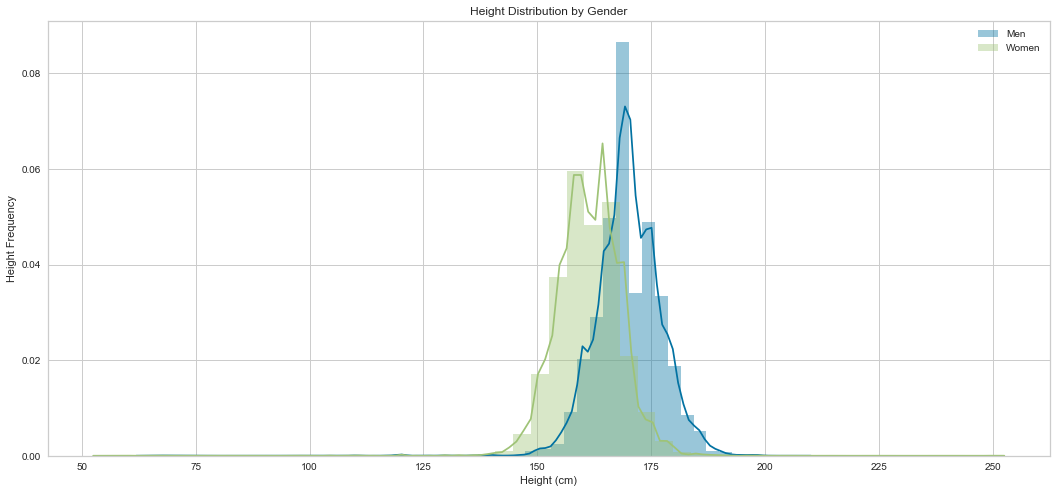

Average height of women within study: 161.35561168460356
Average height of men within study: 169.94789538210054


In [16]:
#checking height distributions by gender
fig = plt.figure(figsize=(16,8))
sns.distplot(population[population['gender'] == 2]['height'], label="Men")
sns.distplot(population[population['gender'] == 1]['height'], label="Women")
plt.title('Height Distribution by Gender')
plt.xlabel('Height (cm)')
plt.ylabel('Height Frequency')
plt.legend()
plt.show();

#checking mean ages between men and women
pop_women_height = population[population['gender'] == 1]['height']
pop_men_height = population[population['gender'] == 2]['height']
print("Average height of women within study:", pop_women_height.mean())
print("Average height of men within study:", pop_men_height.mean())

Men have a higher distribtution range of heights relative to women. Additionally, the average height of men in 
the present study is higher than that of women. This trend mirrors those we see in the real world when 
taking gender into account. 

Average weight of women within study: 72.5656050955414
Average weight of men within study: 77.257306906416


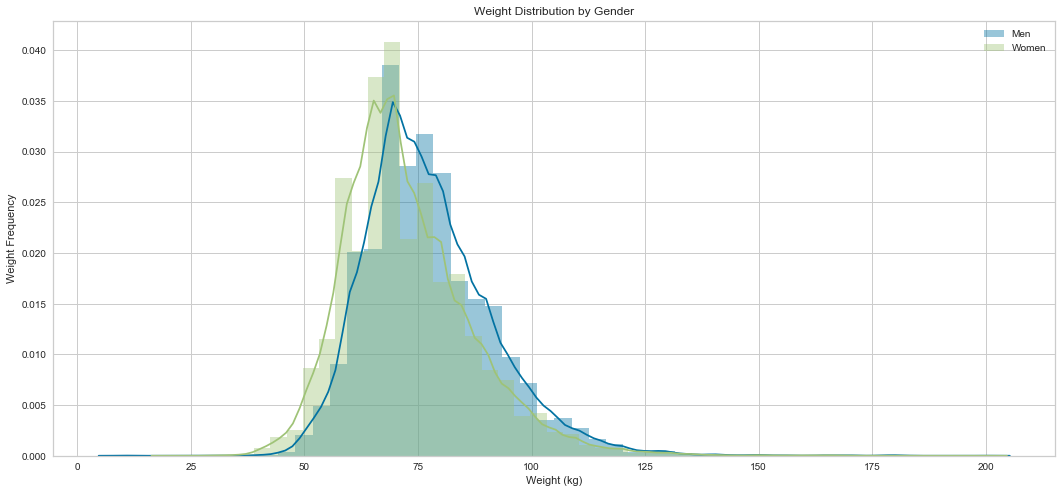

In [17]:
fig = plt.figure(figsize=(16,8))
sns.distplot(population[population['gender'] == 2]['weight'], label="Men")
sns.distplot(population[population['gender'] == 1]['weight'], label="Women")
plt.title('Weight Distribution by Gender')
plt.xlabel('Weight (kg)')
plt.ylabel('Weight Frequency')
plt.legend();

pop_women_weight = population[population['gender'] == 1]['weight']
pop_men_weight = population[population['gender'] == 2]['weight']
print("Average weight of women within study:", pop_women_weight.mean())
print("Average weight of men within study:", pop_men_weight.mean())

Men have a higher density of hevier individuals in addition to having a higher average weight relative to women.
This makes sense as men are taller on average.

In [18]:
population.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


Average BMI of women within study: 27.98758344183285
Average BMI of men within study: 26.75444235728935


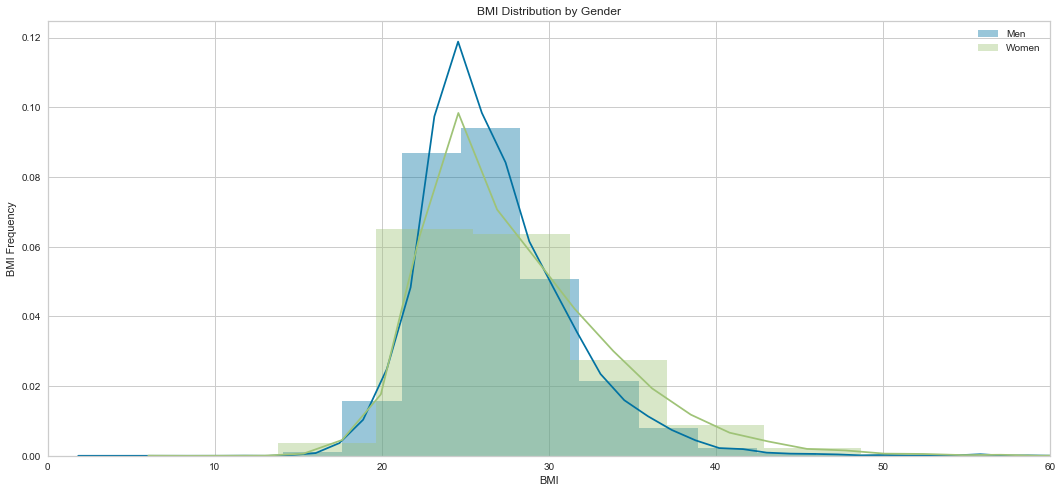

In [19]:
#x was limited to gt a clearer view of distplot barring outliers
fig = plt.figure(figsize=(16,8))
sns.distplot(population[population['gender'] == 2]['BMI'], label="Men")
sns.distplot(population[population['gender'] == 1]['BMI'], label="Women")
plt.title('BMI Distribution by Gender')
plt.xlabel('BMI')
plt.xlim(0, 60)
plt.ylabel('BMI Frequency')
plt.legend();

pop_women_BMI = population[population['gender'] == 1]['BMI']
pop_men_BMI = population[population['gender'] == 2]['BMI']
print("Average BMI of women within study:", pop_women_BMI.mean())
print("Average BMI of men within study:", pop_men_BMI.mean())

Women tend to have higher BMIs on average in addition to higher BMI densities from 28 upwards.

## Do cholesterol and physical activity have an additive effect on cardio?

In [20]:
X = population[['cholesterol', 'active']]
#engineering interaction between cholesterol and pysical activity
X['cholesterol_active'] = X['cholesterol'] * X['active']
y = population['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.666958
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                70000
Model:                          Logit   Df Residuals:                    69996
Method:                           MLE   Df Model:                            3
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:                 0.03778
Time:                        16:33:24   Log-Likelihood:                -46687.
converged:                       True   LL-Null:                       -48520.
                                        LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6434      0.041    -15.745      0.000      -0.724      -0.563
cholesterol            0.5909      0.028     20.760      0.000       0.535       0.647
active                -0.3731      0.046     -8.194      0.000      -0.462      -0.284
cholesterol_active     0.1337      0.032      4.228      0.000       0.072       0.196
======================================================================================
"""

It looks like cholesterol and pysical activity do significantly impact cardiovascular disease both alone and when interacting. 

## Does substance use affect likelihood of engaging in physical activity?

In [22]:
X = population[['smoke', 'alco']]
#engineering interaction between cholesterol and pysical activity
X['smoke_alco'] = X['smoke'] * X['alco']
y = population['active']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.494643
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 active   No. Observations:                70000
Model:                          Logit   Df Residuals:                    69996
Method:                           MLE   Df Model:                            3
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:                0.001103
Time:                        16:33:25   Log-Likelihood:                -34625.
converged:                       True   LL-Null:                       -34663.
                                        LLR p-value:                 1.731e-16
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3812      0.010    137.687      0.000       1.362       1.401
smoke          0.2186      0.042      5.212      0.000       0.136       0.301
alco           0.3109      0.064      4.863      0.000       0.186       0.436
smoke_alco    -0.1925      0.100     -1.932      0.053      -0.388       0.003
==============================================================================
"""

While use of multiple substances does not affect significantly predict physical activity levels, use of varying substances can predict physical activity levels alone.

## Base Logit Model

In [24]:
X = population.drop(['cardio'], axis =1) 
y = population['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.591993
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                70000
Model:                          Logit   Df Residuals:                    69987
Method:                           MLE   Df Model:                           12
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:                  0.1459
Time:                        16:33:25   Log-Likelihood:                -41440.
converged:                       True   LL-Null:                       -48520.
                                        LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -7.9965      0.340    -23.518      0.000      -8.663      -7.330
age             0.0543      0.001     41.849      0.000       0.052       0.057
gender          0.0200      0.021      0.942      0.346      -0.022       0.062
height         -0.0089      0.002     -4.348      0.000      -0.013      -0.005
weight          0.0182      0.002     11.211      0.000       0.015       0.021
ap_hi           0.0395      0.001     65.270      0.000       0.038       0.041
ap_lo           0.0003   6.73e-05      4.457      0.000       0.000       0.000
cholesterol     0.5227      0.015     34.870      0.000       0.493       0.552
gluc           -0.1188      0.017     -6.987      0.000      -0.152      -0.085
smoke          -0.1312      0.033     -3.955      0.000      -0.196      -0.066
alco           -0.1695      0.040     -4.214      0.000      -0.248      -0.091
active         -0.2101      0.021     -9.982      0.000      -0.251      -0.169
BMI            -0.0074      0.004     -1.955      0.051      -0.015    1.91e-05
===============================================================================
"""

All variables are significantly correlated with cardiovascualar disease with the exceptions of BMI and gender. The insignificance of BMI is likely due to being highly correlated to height and weight.

In [25]:
X = population.drop(['cardio', 'BMI'], axis =1) 
y = population['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.592019
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                70000
Model:                          Logit   Df Residuals:                    69988
Method:                           MLE   Df Model:                           11
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:                  0.1459
Time:                        16:33:26   Log-Likelihood:                -41441.
converged:                       True   LL-Null:                       -48520.
                                        LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.5104      0.214    -39.725      0.000      -8.930      -8.091
age             0.0543      0.001     41.889      0.000       0.052       0.057
gender          0.0153      0.021      0.727      0.467      -0.026       0.057
height         -0.0057      0.001     -4.656      0.000      -0.008      -0.003
weight          0.0153      0.001     23.275      0.000       0.014       0.017
ap_hi           0.0395      0.001     65.314      0.000       0.038       0.041
ap_lo           0.0003   6.73e-05      4.456      0.000       0.000       0.000
cholesterol     0.5233      0.015     34.917      0.000       0.494       0.553
gluc           -0.1186      0.017     -6.978      0.000      -0.152      -0.085
smoke          -0.1316      0.033     -3.968      0.000      -0.197      -0.067
alco           -0.1691      0.040     -4.204      0.000      -0.248      -0.090
active         -0.2098      0.021     -9.967      0.000      -0.251      -0.169
===============================================================================
"""

The present model shows gender as the only insignificant factor in predicting cardiovascular disease.

In [26]:
X = population.drop(['cardio', 'weight', 'height'], axis =1) 
y = population['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.593034
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                70000
Model:                          Logit   Df Residuals:                    69989
Method:                           MLE   Df Model:                           10
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:                  0.1444
Time:                        16:33:26   Log-Likelihood:                -41512.
converged:                       True   LL-Null:                       -48520.
                                        LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.3418      0.106    -88.155      0.000      -9.549      -9.134
age             0.0537      0.001     41.567      0.000       0.051       0.056
gender          0.0739      0.019      3.932      0.000       0.037       0.111
ap_hi           0.0401      0.001     66.365      0.000       0.039       0.041
ap_lo           0.0003   6.75e-05      4.446      0.000       0.000       0.000
cholesterol     0.5254      0.015     35.109      0.000       0.496       0.555
gluc           -0.1135      0.017     -6.687      0.000      -0.147      -0.080
smoke          -0.1269      0.033     -3.835      0.000      -0.192      -0.062
alco           -0.1619      0.040     -4.034      0.000      -0.241      -0.083
active         -0.2114      0.021    -10.056      0.000      -0.253      -0.170
BMI             0.0328      0.002     19.604      0.000       0.030       0.036
===============================================================================
"""

Interesting. When weight and height are replaced with BMI, the entire suite of variables is significant unlike our previous models. Though, it should be noted that BMI has a slightly higher standard error across all models it is included in relative to weight and height.

# Removing Outliers

In [27]:
population.shape

(70000, 13)

In [28]:
population.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [29]:
#rearranging columns to make removing outliers easier and more preceise. 
#note removal of BMI and height/weight respectively
population_hw = population[['age',  'height', 'weight', 'ap_hi', 'ap_lo', 'gender','cholesterol', 
                         'gluc', 'smoke', 'alco', 'active', 'cardio']]
population_BMI = population[['age',  'BMI', 'ap_hi', 'ap_lo', 'gender','cholesterol', 
                         'gluc', 'smoke', 'alco', 'active', 'cardio']]

In [30]:
#confirming removal of targeted variables
display(population_hw.head(), population_BMI.head())

,age,height,weight,ap_hi,ap_lo,gender,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.391781,168,62.0,110,80,2,1,1,0,0,1,0
1,55.419178,156,85.0,140,90,1,3,1,0,0,1,1
2,51.663014,165,64.0,130,70,1,3,1,0,0,0,1
3,48.282192,169,82.0,150,100,2,1,1,0,0,1,1
4,47.873973,156,56.0,100,60,1,1,1,0,0,0,0


,age,BMI,ap_hi,ap_lo,gender,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,
0,50.391781,21.967120,110,80,2,1,1,0,0,1,0
1,55.419178,34.927679,140,90,1,3,1,0,0,1,1
2,51.663014,23.507805,130,70,1,3,1,0,0,0,1
3,48.282192,28.710479,150,100,2,1,1,0,0,1,1
4,47.873973,23.011177,100,60,1,1,1,0,0,0,0


In [31]:
#isolating continuous varables to remove outliers
display(population_hw[population_hw.columns[:5]].head(), population_BMI[population_BMI.columns[:4]].head())

,age,height,weight,ap_hi,ap_lo
id,,,,,
0,50.391781,168,62.0,110,80
1,55.419178,156,85.0,140,90
2,51.663014,165,64.0,130,70
3,48.282192,169,82.0,150,100
4,47.873973,156,56.0,100,60


,age,BMI,ap_hi,ap_lo
id,,,,
0,50.391781,21.967120,110,80
1,55.419178,34.927679,140,90
2,51.663014,23.507805,130,70
3,48.282192,28.710479,150,100
4,47.873973,23.011177,100,60


In [32]:
#converting values to z-scores
z_hw = np.abs(stats.zscore(population_hw[population_hw.columns[:5]]))
z_BMI = np.abs(stats.zscore(population_BMI[population_BMI.columns[:4]]))

In [33]:
#removal of outliers
population_hw = population_hw[(z_hw < 3).all(axis=1)]
population_BMI = population_BMI[(z_BMI < 3).all(axis=1)]
display(population_hw.shape, population_BMI.shape)

(68067, 12)

(68493, 11)

In [34]:
#checking base model predictive power
print("Population_hw base value:" '\n', population_hw.cardio.value_counts(normalize=True), '\n\n', 
      "Population_BMI base value:" '\n', population_BMI.cardio.value_counts(normalize=True))

Population_hw base value:
 0    0.507133
1    0.492867
Name: cardio, dtype: float64 

 Population_BMI base value:
 0    0.506285
1    0.493715
Name: cardio, dtype: float64


When left to chance, both models have an accuracy of approximately 50%.

# Base Classification Model Exploration

In [35]:
#creating a list of classifiers with uniform random states to interate through via function
clf_list = [XGBClassifier(random_state=0), LogisticRegression(random_state=0), 
            AdaBoostClassifier(random_state=0), GradientBoostingClassifier(random_state=0)]

In [36]:
def classifier_generator(df, y, X, clf_list):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
        
        for i in clf_list:
            clf = i
            
            clf.fit(X_train, y_train)

            training_preds = clf.predict(X_train)
            test_preds = clf.predict(X_test)

            training_accuracy = accuracy_score(y_train, training_preds)
            test_accuracy = accuracy_score(y_test, test_preds)

            print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
            print('Validation Accuracy: {:.4}%'.format(test_accuracy * 100))

            cm = ConfusionMatrix(clf, classes=[0,1])
            cm.fit(X_train, y_train)
            cm.score(X_test, y_test)
            cm.show();

Training Accuracy: 73.79%
Validation Accuracy: 73.73%


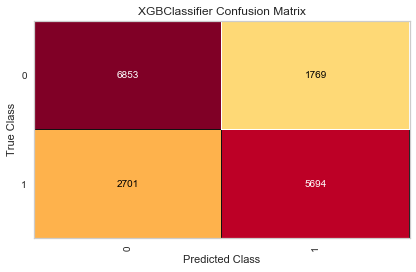

Training Accuracy: 72.52%
Validation Accuracy: 72.67%


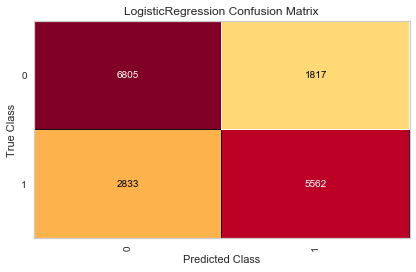

Training Accuracy: 72.89%
Validation Accuracy: 73.15%


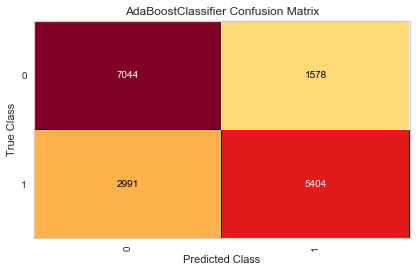

Training Accuracy: 73.77%
Validation Accuracy: 73.58%


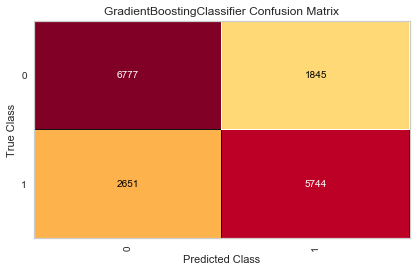

In [37]:
classifier_generator(population_hw, population_hw['cardio'], population_hw.drop(columns=['cardio'], axis=1), clf_list)

XGB has the highest trainging and validation accuracies, making it the best base classifer for population_hw.

Training Accuracy: 73.95%
Validation Accuracy: 73.06%


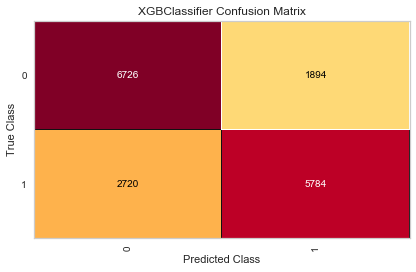

Training Accuracy: 72.69%
Validation Accuracy: 72.31%


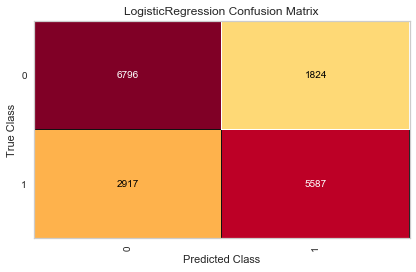

Training Accuracy: 73.31%
Validation Accuracy: 72.61%


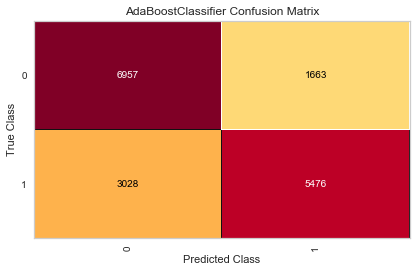

Training Accuracy: 73.86%
Validation Accuracy: 73.16%


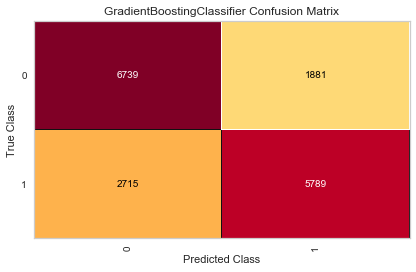

In [38]:
classifier_generator(population_BMI, population_BMI['cardio'], population_BMI.drop(columns=['cardio'], axis=1), clf_list)

XGB classification performed the best here as well

## Hyperparameter Tuning

## population_hw

In [39]:
y = population_hw['cardio']
X = population_hw.drop(columns=['cardio'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = XGBClassifier(random_state=0)
clf.fit(X_train, y_train)

training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

#displaying pretuning model
print('Before Hyperparameter Tuning:', '\n')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation Accuracy: {:.4}%'.format(test_accuracy * 100), '\n')

#parameter grid (parameters limited to control for long run times)
#code was run multiple times to narrow optimal parameters
param_grid = {
    'learning_rate': [0.1, .15],
    'max_depth': [6],
    'min_child_weight': [2],
    'subsample': [0.7],
    'n_estimators': [50, 100]
}

grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters:', '\n')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Hyperparameter Tuned Model:', '\n')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation Accuracy: {:.4}%'.format(test_accuracy * 100))

Before Hyperparameter Tuning: 

Training Accuracy: 73.79%
Validation Accuracy: 73.73% 

Grid Search found the following optimal parameters: 

learning_rate: 0.1
max_depth: 6
min_child_weight: 2
n_estimators: 50
subsample: 0.7
Hyperparameter Tuned Model: 

Training Accuracy: 74.49%
Validation Accuracy: 73.69%


The population_hw XGBoost model was improved by .7%. A marginal increase. However, the model has imporved its predictive power by 23.78% relative to baseline. Overall, a great improvement considering how accurate the validation was trailing by .8%.

## population_BMI

In [40]:
y = population_BMI['cardio']
X = population_BMI.drop(columns=['cardio'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = XGBClassifier(random_state=0)
clf.fit(X_train, y_train)

training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

#displaying pretuning model
print('Before Hyperparameter Tuning:')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation Accuracy: {:.4}%'.format(test_accuracy * 100), '\n')

#parameter grid (parameters limited to control for long run times)
#code was run multiple times to narrow optimal parameters
param_grid = {
    'learning_rate': [0.1, .2],
    'max_depth': [4,5],
    'min_child_weight': [2, 3],
    'subsample': [.7, .9],
    'n_estimators': [100, 115]
}

grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters:')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print()
print('Hyperparameter Tuned Model:')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation Accuracy: {:.4}%'.format(test_accuracy * 100))

Before Hyperparameter Tuning:
Training Accuracy: 73.95%
Validation Accuracy: 73.06% 

Grid Search found the following optimal parameters:
learning_rate: 0.1
max_depth: 4
min_child_weight: 2
n_estimators: 100
subsample: 0.7

Hyperparameter Tuned Model:
Training Accuracy: 74.2%
Validation Accuracy: 73.14%


The population_hw XGBoost model was improved by .25%. Also an ok improvement. Escpecially considering the base model was 23.57% less accurate. Validation was close being 1.06% different from the training data.

# Conclusions
* Better data may lead to a stronger model. The following changes should be considered during the next round of data aquisition.
    * More men must be added to next study iteraction to get ratio of men to women closer to 1:1. Similar to the global statistic
    * measuring the following variables as continuous variables instead of categorical or binary varialbes:
        * glucose (mM/L)
        * cholesterol (mg/dL)
        * alcohol (number of drinks a day)
        * smoking (number of packs per day)
        * physical activity (number of days per week)
* Substance use (smoking and alcohol) do not significantly interact when predicting cardiovascular disease.
* Cholesterol and physical activity interact significantly when predicting cardiovascualar disease
* Both models improved the baseline model ~25%
    * population_hw did slightly better, but we should note that gender was not a significant factor in the base statistical model.
* The models could be used as a guide post of sorts when predicting if a patient has cardiovascular disease or not.
    * If used in this way, I favor population_BMI. The base model does not have insignificant factors despite the contested nature of BMI as a measurement of health.